--- Phase 2: Comparison Results ---
Random Forest Accuracy: 0.7889
XGBoost Accuracy:       0.7818


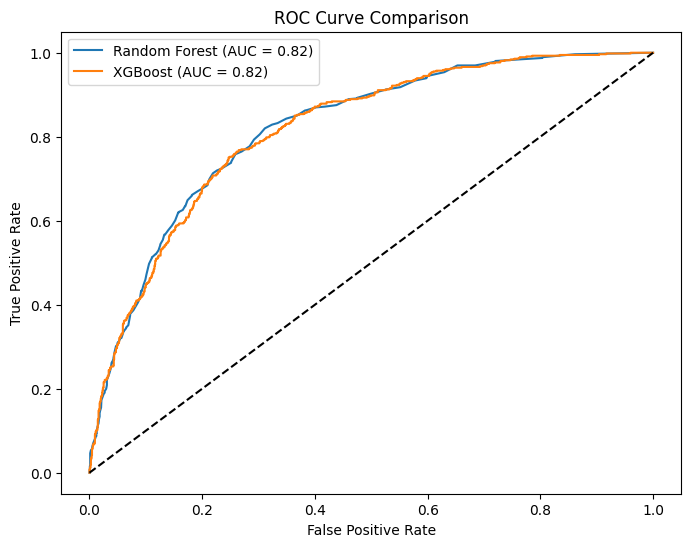

In [5]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Initialize Advanced Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train and Predict - Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# 3. Train and Predict - XGBoost
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# 4. Results Summary
print(f"--- Phase 2: Comparison Results ---")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"XGBoost Accuracy:       {accuracy_score(y_test, xgb_pred):.4f}")

# 5. ROC Curve Comparison (Visual Requirement for Phase 2)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()